# Introduction to music21 with our dataset

In [1]:
import pandas as pd
%pip install music21
from music21 import *

Note: you may need to restart the kernel to use updated packages.


## Read dataset

In [2]:
#Read galician_musicxml_full.csv but is in father folder
df = pd.read_csv('../galician_musicxml_full.csv',quotechar='"',skipinitialspace=True)

#df = pd.read_csv('galician_musicxml_full.csv',quotechar='"',skipinitialspace=True)

#drop first column
#name first column id
df = df.rename(columns={'Unnamed: 0': 'id'})
df

,id,name,location
0,0,Muiñeira dos Fosados,Fosados
1,1,Detrás das airas,airas
2,2,Muiñeira de Quindous,Quindous
3,3,Muiñeira de Quindous,"Quindous, Cervantes, Lugo"
4,4,Muiñeira,NaN
...,...,...,...
449,449,Carballesa do Incio,Incio
450,450,Muiñeira de Vilarmide,"Vilarmide, A Pontenova"
451,451,Na Ruada,NaN
452,452,Danza Anterga de Lugo,Lugo


Let's load a music score. Music21 will load it as a `stream.Score`. We can give it a look using `.show()`.

<class 'music21.stream.base.Score'>


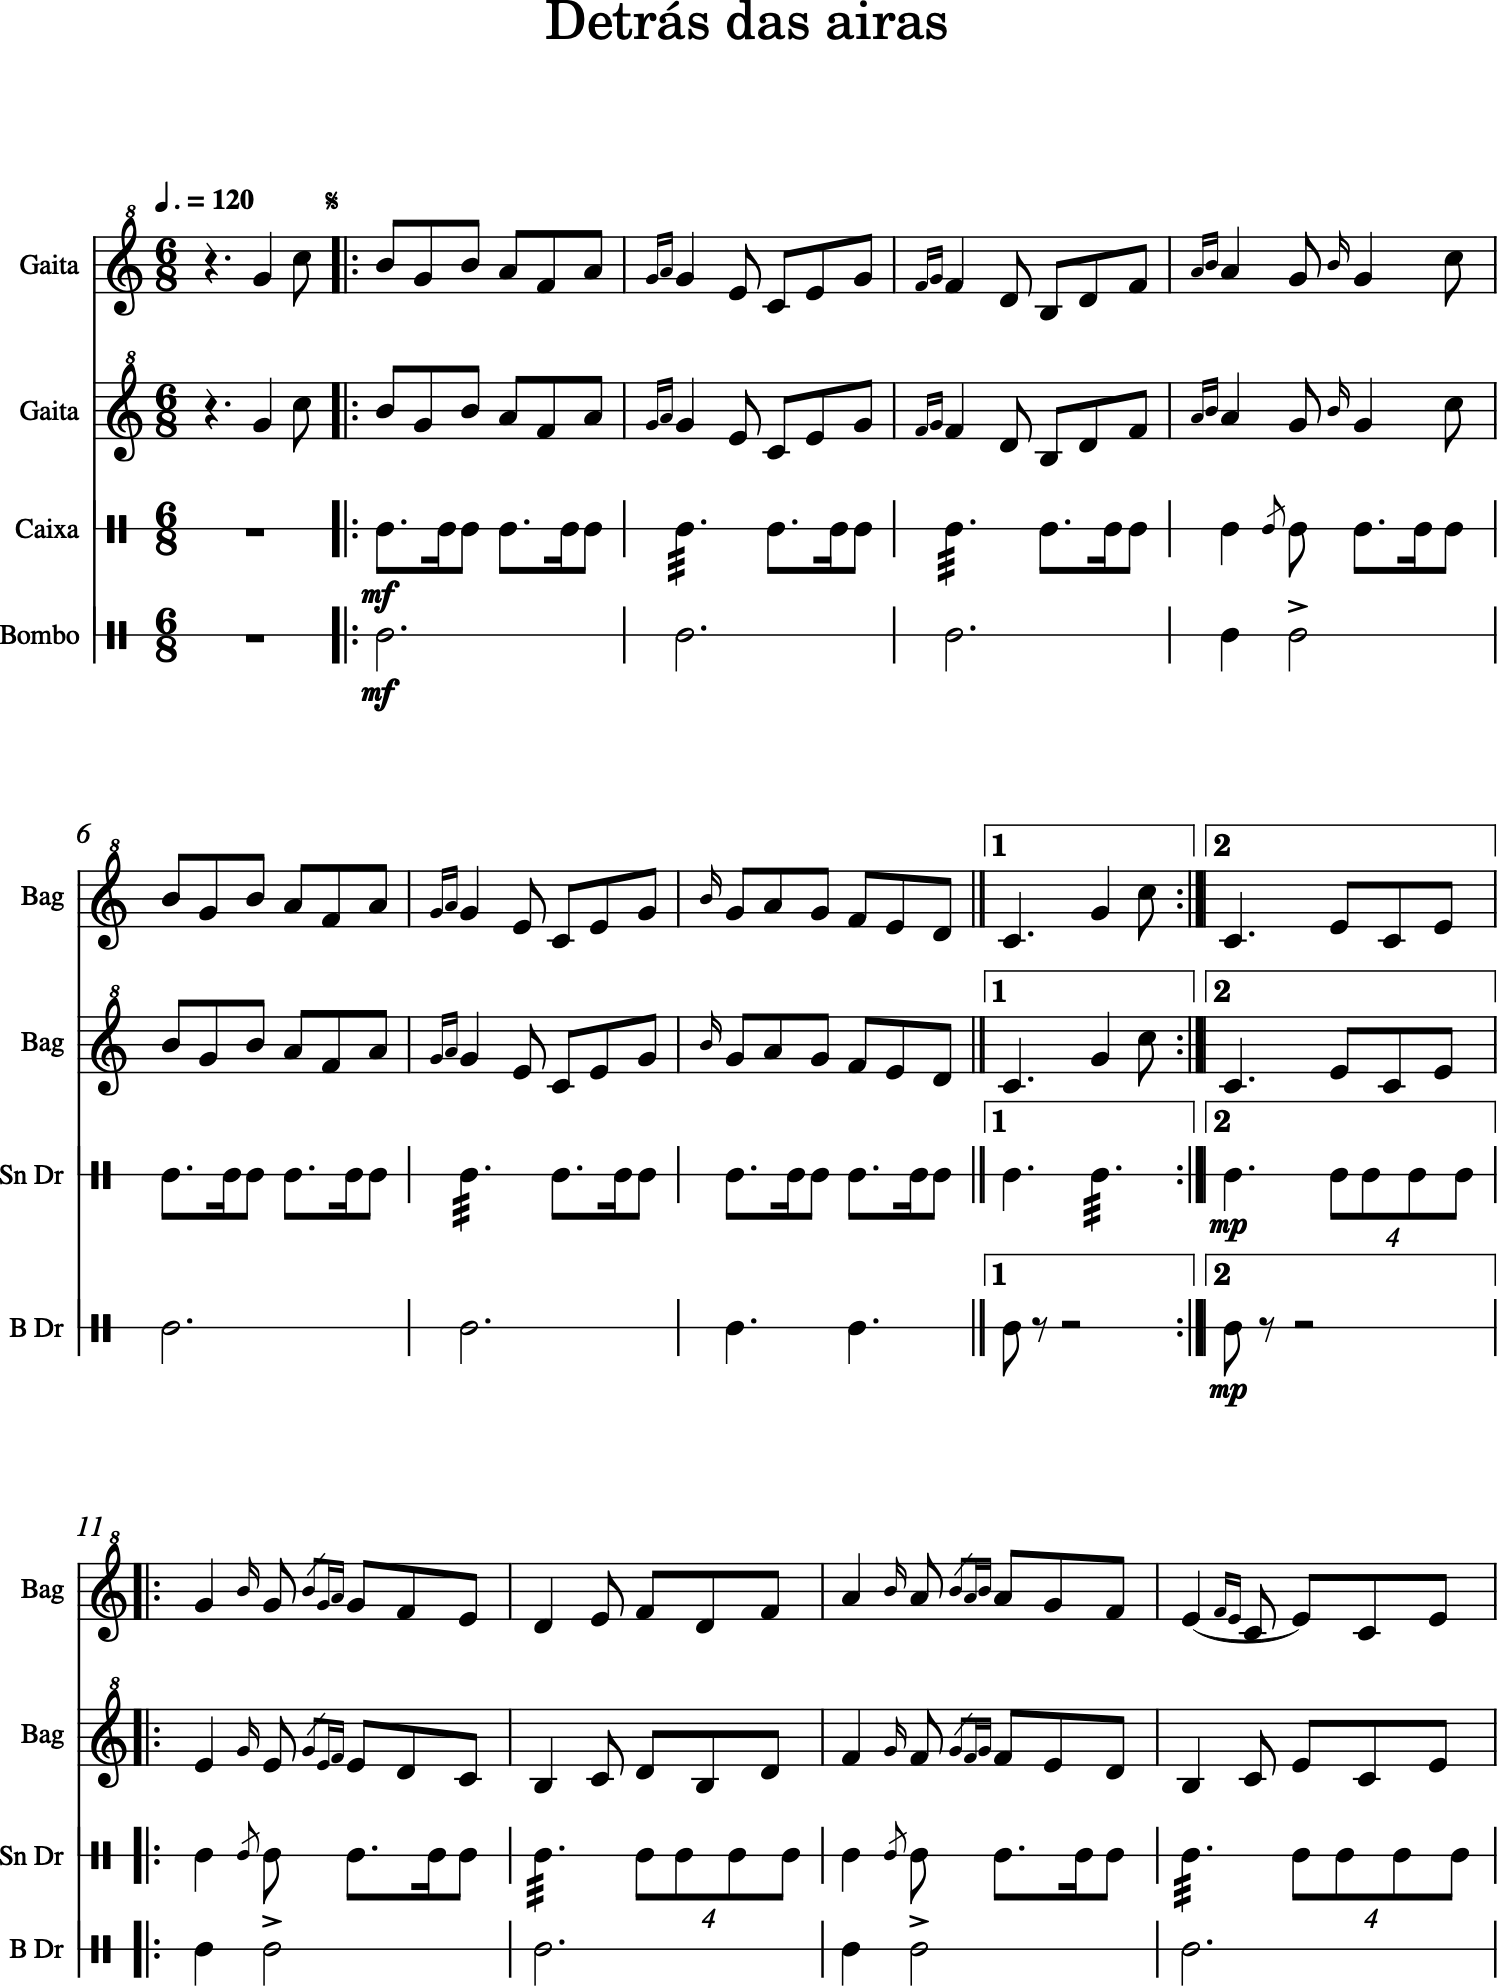

In [14]:
s = converter.parse('/Users/maria/Desktop/master/GMD-classification/data/1.musicxml')

print(type(s))
s.show()

## Elements contained in the music21 stream

In [4]:
print('This score contains these {} elements'.format(len(s.elements)))
for element in s.elements:
    print('-', element)

This score contains these 5 elements
- <music21.text.TextBox 'Muiñeira d...'>
- <music21.metadata.Metadata object at 0x129841630>
- <music21.stream.Part Gaita>
- <music21.stream.Part Gaita>
- <music21.layout.ScoreLayout>


As you can see, a `stream.Score` contains more than music. If we want to focus on the music, we can call the `.parts` attribute.
<br/>
By the way, music21 will work better if you store anything you retrieve from a stream in another stream, using the `.stream()` method.

In [5]:
scoreParts = s.parts.stream()
for element in scoreParts.elements:
    print(element)

<music21.stream.Part Gaita>
<music21.stream.Part Gaita>


## Parts of the song (voices)
Now we can work with each of these parts, and have a look at them separately. We can call the `.show()` method with any stream.
<br/>
*\[When the part is opened in the score editor, notice that now all the metadata are missing, because they are not contained in the `stream.Part`, but as specific objects in the `stream.Score`.\]*

<music21.stream.Part Gaita>
<music21.stream.Part Gaita>


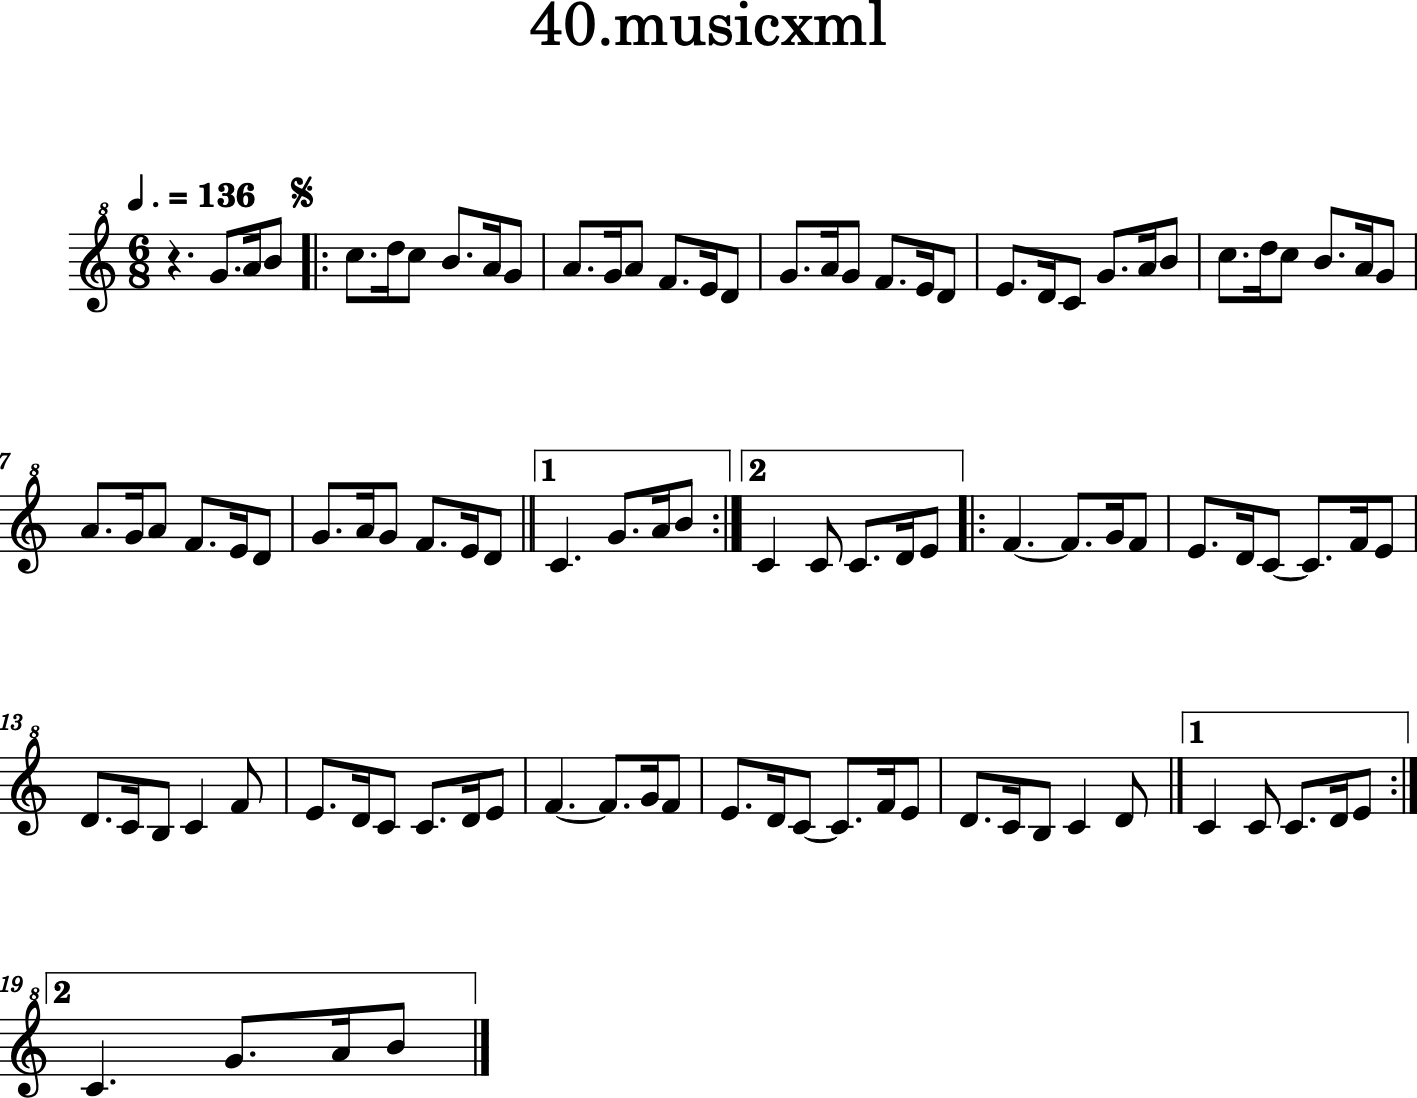

In [6]:
scoreParts = s.parts.stream()
for element in scoreParts.elements:
    print(element)
part0 = scoreParts[0]
part1 = scoreParts[1]

part0.show()

In [7]:
print('Elements in part 0:', len(part0.elements))
print('Elements in part 1:', len(part1.elements))

Elements in part 0: 24
Elements in part 1: 24


Know how many elements there are in every part. In this particular example they should be equal.

In [8]:
part0.elements

(<music21.instrument.Bagpipes 'P1: Gaita'>,
 <music21.stream.Measure 1 offset=0.0>,
 <music21.spanner.RepeatBracket 1 <music21.stream.Measure 9 offset=0.0>>,
 <music21.spanner.RepeatBracket 2 <music21.stream.Measure 10 offset=0.0>>,
 <music21.spanner.RepeatBracket 1 <music21.stream.Measure 18 offset=0.0>>,
 <music21.spanner.RepeatBracket 2 <music21.stream.Measure 19 offset=0.0>>,
 <music21.stream.Measure 2 offset=3.0>,
 <music21.stream.Measure 3 offset=6.0>,
 <music21.stream.Measure 4 offset=9.0>,
 <music21.stream.Measure 5 offset=12.0>,
 <music21.stream.Measure 6 offset=15.0>,
 <music21.stream.Measure 7 offset=18.0>,
 <music21.stream.Measure 8 offset=21.0>,
 <music21.stream.Measure 9 offset=0.0>,
 <music21.stream.Measure 10 offset=0.0>,
 <music21.stream.Measure 11 offset=30.0>,
 <music21.stream.Measure 12 offset=33.0>,
 <music21.stream.Measure 13 offset=36.0>,
 <music21.stream.Measure 14 offset=39.0>,
 <music21.stream.Measure 15 offset=42.0>,
 <music21.stream.Measure 16 offset=45.0>,


In [13]:
part1.elements

(<music21.instrument.Bagpipes 'P2: Gaita: Gaita'>,
 <music21.stream.Measure 1 offset=0.0>,
 <music21.spanner.RepeatBracket 1. <music21.stream.Measure 8 offset=0.0><music21.stream.Measure 9 offset=0.0>>,
 <music21.spanner.RepeatBracket 2. <music21.stream.Measure 10 offset=0.0>>,
 <music21.spanner.RepeatBracket 1. <music21.stream.Measure 18 offset=0.0><music21.stream.Measure 19 offset=0.0>>,
 <music21.spanner.RepeatBracket 2. <music21.stream.Measure 20 offset=0.0><music21.stream.Measure 21 offset=0.0>>,
 <music21.spanner.RepeatBracket 1. <music21.stream.Measure 28 offset=0.0><music21.stream.Measure 29 offset=0.0>>,
 <music21.spanner.RepeatBracket 2. <music21.stream.Measure 30 offset=0.0><music21.stream.Measure 31 offset=0.0>>,
 <music21.stream.Measure 2 offset=3.0>,
 <music21.stream.Measure 3 offset=6.0>,
 <music21.stream.Measure 4 offset=9.0>,
 <music21.stream.Measure 5 offset=12.0>,
 <music21.stream.Measure 6 offset=15.0>,
 <music21.stream.Measure 7 offset=18.0>,
 <music21.stream.Measu

As you can see, each part contains one instrument object, many slur objects, and many measure objects. The music is contained in the measures, so let's retrieve only those, by using the `.getElementsByClass()` method. 
<br/>
Remember to store everything you retrieve from a stream in another stream.

In [9]:
measures0 = part0.getElementsByClass(stream.Measure).stream() #numero de compases
measures1 = part1.getElementsByClass(stream.Measure).stream() #numero de compases
print('Measures in part 0:', len(measures0))
print('Measures in part 1:', len(measures1))

measures0.elements

Measures in part 0: 19
Measures in part 1: 19


(<music21.stream.Measure 1 offset=0.0>,
 <music21.stream.Measure 2 offset=3.0>,
 <music21.stream.Measure 3 offset=6.0>,
 <music21.stream.Measure 4 offset=9.0>,
 <music21.stream.Measure 5 offset=12.0>,
 <music21.stream.Measure 6 offset=15.0>,
 <music21.stream.Measure 7 offset=18.0>,
 <music21.stream.Measure 8 offset=21.0>,
 <music21.stream.Measure 9 offset=24.0>,
 <music21.stream.Measure 10 offset=27.0>,
 <music21.stream.Measure 11 offset=30.0>,
 <music21.stream.Measure 12 offset=33.0>,
 <music21.stream.Measure 13 offset=36.0>,
 <music21.stream.Measure 14 offset=39.0>,
 <music21.stream.Measure 15 offset=42.0>,
 <music21.stream.Measure 16 offset=45.0>,
 <music21.stream.Measure 17 offset=48.0>,
 <music21.stream.Measure 18 offset=51.0>,
 <music21.stream.Measure 19 offset=54.0>)

Measure: identified by a number + an offset (accessing the `.number` and `.offset`)

Offset: every music21 object is stored in a particular position respect to its containing stream.

In [10]:
for m in measures0[0:10]:
    print('Measure number: {}\tMeasure offset: {}'.format(m.number, m.offset))

Measure number: 1	Measure offset: 0.0
Measure number: 2	Measure offset: 3.0
Measure number: 3	Measure offset: 6.0
Measure number: 4	Measure offset: 9.0
Measure number: 5	Measure offset: 12.0
Measure number: 6	Measure offset: 15.0
Measure number: 7	Measure offset: 18.0
Measure number: 8	Measure offset: 21.0
Measure number: 9	Measure offset: 24.0
Measure number: 10	Measure offset: 27.0


Take a look at what's inside the first measure.

The first measure of a part usually contains the clef, key signature and time signature objects.

In [11]:
measures0[0].elements

(<music21.layout.SystemLayout>,
 <music21.clef.Treble8vaClef>,
 <music21.tempo.MetronomeMark Dotted Quarter=136.0>,
 <music21.key.KeySignature of no sharps or flats>,
 <music21.meter.TimeSignature 6/8>,
 <music21.note.Rest dotted-quarter>,
 <music21.note.Note G>,
 <music21.note.Note A>,
 <music21.note.Note B>)

What kind of information we can obtain about the key signature?

In [12]:
kS = measures0[0].getElementsByClass(key.KeySignature).stream()[0]
print('Class:', type(kS))
print('Number of altered pitches:', kS.sharps)
print('List of altered pitches:', kS.alteredPitches)
print('Measure number:', kS.measureNumber)
print('Offset:', kS.offset)

Class: <class 'music21.key.KeySignature'>
Number of altered pitches: 0
List of altered pitches: []
Measure number: 1
Offset: 0.0


And about the time signature?

In [13]:
tS = measures0[0].getElementsByClass(meter.TimeSignature).stream()[0]
print('Class:', type(tS))
print('Numerator:', tS.numerator)
print('Denominator:', tS.denominator)
print('Measure number:', tS.measureNumber)
print('Offset:', tS.offset)

Class: <class 'music21.meter.base.TimeSignature'>
Numerator: 6
Denominator: 8
Measure number: 1
Offset: 0.0


We try the first note after the modulation

In [21]:
measure0_22 = part0.measure(22)
print('Measure number {} in offset {}'.format(measure0_22.number, measure0_22.offset))
print()
print('It contains the following elements:')
for element in measure0_22.elements:
    print(element)

Measure number 22 in offset 63.0

It contains the following elements:
<music21.bar.Repeat direction=start>
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note D>


In [23]:
n1 = measure0_22[1] #no ponemos el primero, el 0 pq sino nos manda a la barra de repetición
print('Class', type(n1))
print('Measure number:', n1.measureNumber)
print('Note offset:', n1.offset)
print('Is it a note?', n1.isNote)
print('Is it a rest?', n1.isRest)

Class <class 'music21.note.Note'>
Measure number: 22
Note offset: 0.0
Is it a note? True
Is it a rest? False


En music21, un offset es una medida de tiempo relativa que se expresa en fracciones de un "tiempo de referencia". 

Por defecto, el tiempo de referencia es de un cuarto de nota (es decir, un cuarto de compás), por lo que un offset de 0.0 corresponde al inicio del primer compás de la pieza, 0.5 corresponde a la mitad del primer tiempo, 1.0 corresponde al inicio del segundo tiempo, y así sucesivamente.

In [24]:
print('Frequency:', n1.pitch.frequency)
print('Name:', n1.pitch.name)
print('Step:', n1.pitch.step)
print('Octave:', n1.pitch.octave)
print('Name with octave:', n1.pitch.nameWithOctave)
print('Midi:', n1.pitch.midi)
print('Name in Spanish:', n1.pitch.spanish)
print()
print('Accidental:', n1.pitch.accidental.name)
print('Accidental value:', n1.pitch.accidental.alter)

Frequency: 493.8833012561241
Name: B
Step: B
Octave: 4
Name with octave: B4
Midi: 71
Name in Spanish: si

Accidental: natural
Accidental value: 0.0


A note object, when it is a note, contains a pitch object and a duration object.
<br/>
Let's have a look first to the attributes of the pitch object contained in `n1`.

In [25]:
print('Duration type:', n1.duration.type)
print('Duration name:', n1.duration.fullName)
print('Duration as quarter length:', n1.duration.quarterLength)

Duration type: eighth
Duration name: Eighth
Duration as quarter length: 0.5


In [26]:
print('Name:', n1.name)
print('Step:', n1.step)
print('Octave:', n1.octave)
print('Name with octave:', n1.nameWithOctave)
print()
print('Duration as quarter length:', n1.quarterLength)

Name: B
Step: B
Octave: 4
Name with octave: B4

Duration as quarter length: 0.5


[Grace notes](https://en.wikipedia.org/wiki/Grace_note) are assigned a `quarterLength` duration of 0, and are located in the same offset as the following main note.

In [28]:
n2 = measure0_22[1]
n3 = measure0_22[2]
print('Name:\t\t{}\t{}'.format(n2.nameWithOctave, n3.nameWithOctave))
print('Duration:\t{}\t{}'.format(n2.quarterLength, n3.quarterLength))
print('Offset:\t\t{}\t{}'.format(n2.offset, n3.offset))

Name:		B4	C5
Duration:	0.5	0.5
Offset:		0.0	0.5


Taking notes from the second voice (what he calls second part)

**Measure = compás (la sección que comprende un compás)**

In [29]:
measure1_9 = part1.measure(9)
n4 = measure1_9[0]
print('Name:', n4.nameWithOctave)
print('Duration:', n4.quarterLength)

Name: G5
Duration: 1.5


## Lyrics
With the `.lyric` attribute we can check if a note object contains lyrics.

In [30]:
print('Does n1 have lyrics?', n1.lyric != None)
print('Does n4 have lyrics?', n4.lyric != None)

Does n1 have lyrics? False
Does n4 have lyrics? False


In [31]:
print("n4's lyric:", n4.lyric) #what lyrics does that feature have?


n4's lyric: None


## Dots and ties
Duration can be extended using dots and ties. Music21 handels them in the following ways.

In [32]:
n5 = measure1_9[1]
print('Duration:', n5.quarterLength)
print('Duration type:', n5.duration.type)
print('Duration name:', n5.duration.fullName)
print('Duration as quarter length:', n5.duration.quarterLength)
print('Dots:', n5.duration.dots)

Duration: 0.5
Duration type: eighth
Duration name: Eighth
Duration as quarter length: 0.5
Dots: 0


In [46]:
measure1_20 = part1.measure(5)
print(part1.measure(5))
measure1_21 = part1.measure(6)
print(part1.measure(6))

n6 = measure1_20[-1]
n7 = measure1_21[2]

print('Pitch name:\t{}\t{}'.format(n6.nameWithOctave, n7.nameWithOctave))
print('Duration:\t{}\t{}'.format(n6.quarterLength, n7.quarterLength))
print('Tie:\t\t{}\t{}'.format(n6.tie.type, n7.tie.type))

<music21.stream.Measure 5 offset=12.0>
<music21.stream.Measure 6 offset=15.0>
Pitch name:	E5	E5
Duration:	0.5	0.5


AttributeError: 'NoneType' object has no attribute 'type'

## Trying to separate the songs with some kind of percusion

<class 'music21.stream.base.Score'>


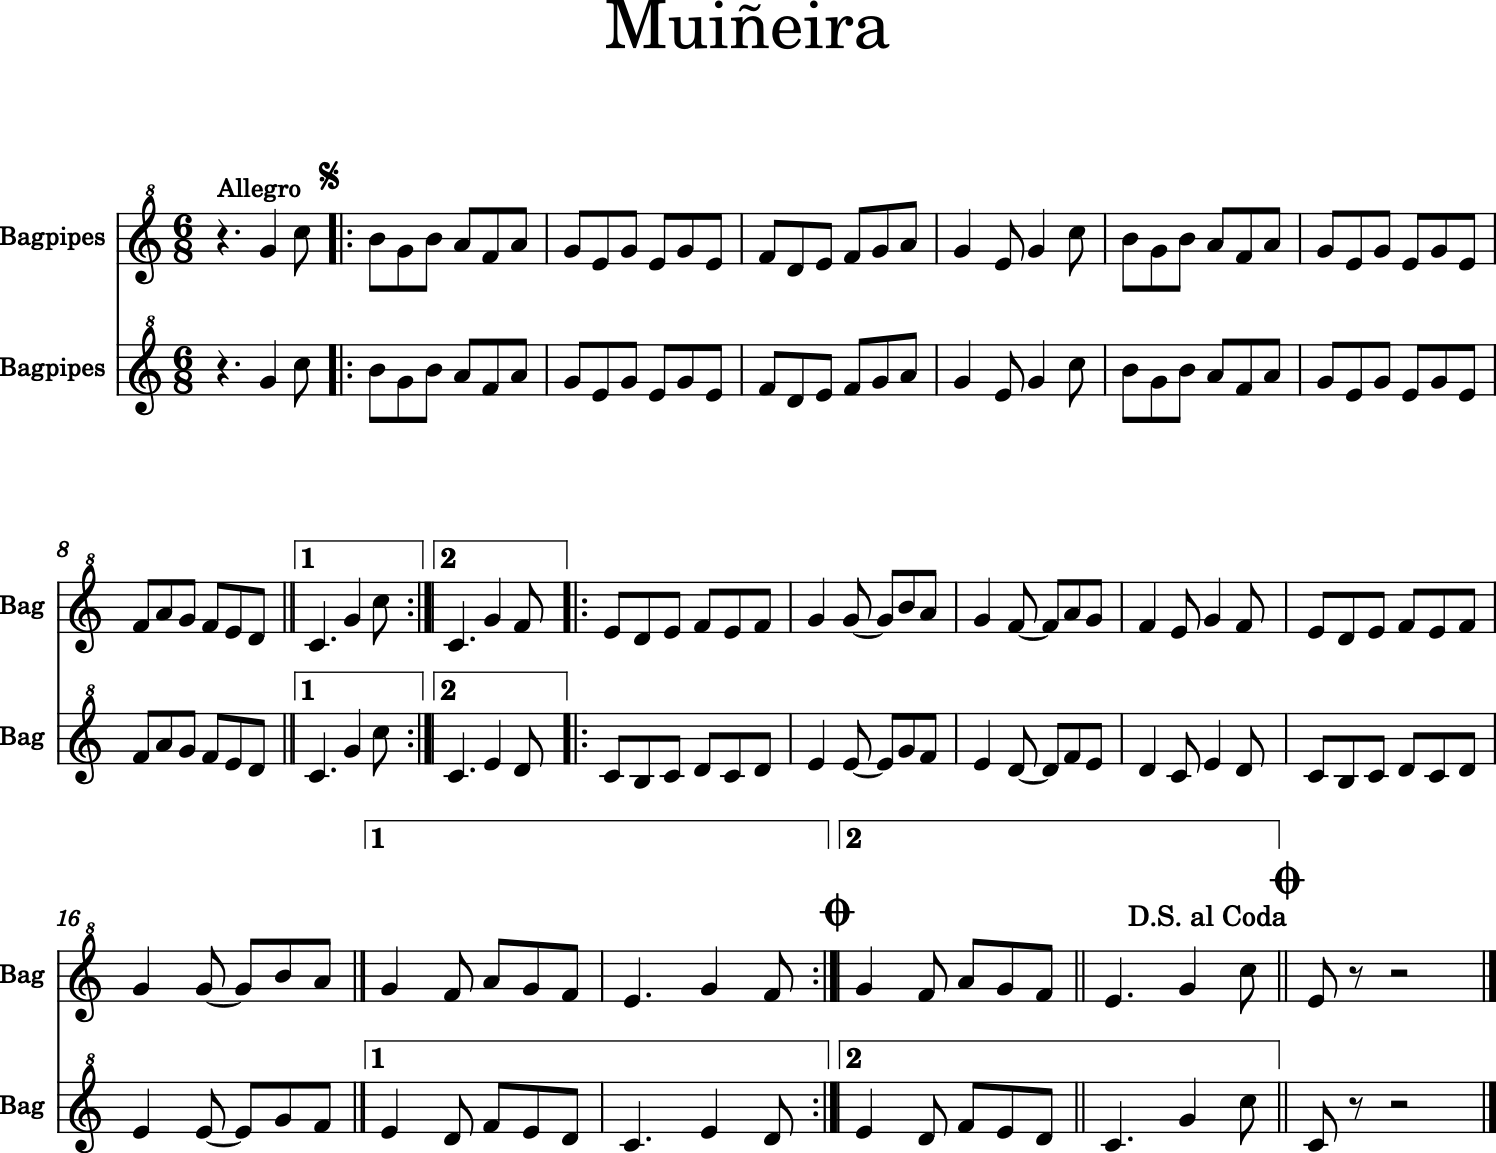

In [15]:
df = df.rename(columns={'Unnamed: 0': 'id'})
df

s = converter.parse('/Users/maria/Desktop/master/GMD-classification/data/7.musicxml')

print(type(s))
s.show()

In [49]:
print('This score contains these {} elements'.format(len(s.elements)))
for element in s.elements:
    print('-', element)

This score contains these 7 elements
- <music21.text.TextBox 'Detrás das...'>
- <music21.metadata.Metadata object at 0x1650c6e00>
- <music21.stream.Part Gaita>
- <music21.stream.Part Gaita>
- <music21.stream.Part Caixa>
- <music21.stream.Part Bombo>
- <music21.layout.ScoreLayout>


In [51]:
scoreParts = s.parts.stream()
for element in scoreParts.elements:
    print(element)

<music21.stream.Part Gaita>
<music21.stream.Part Gaita>
<music21.stream.Part Caixa>
<music21.stream.Part Bombo>


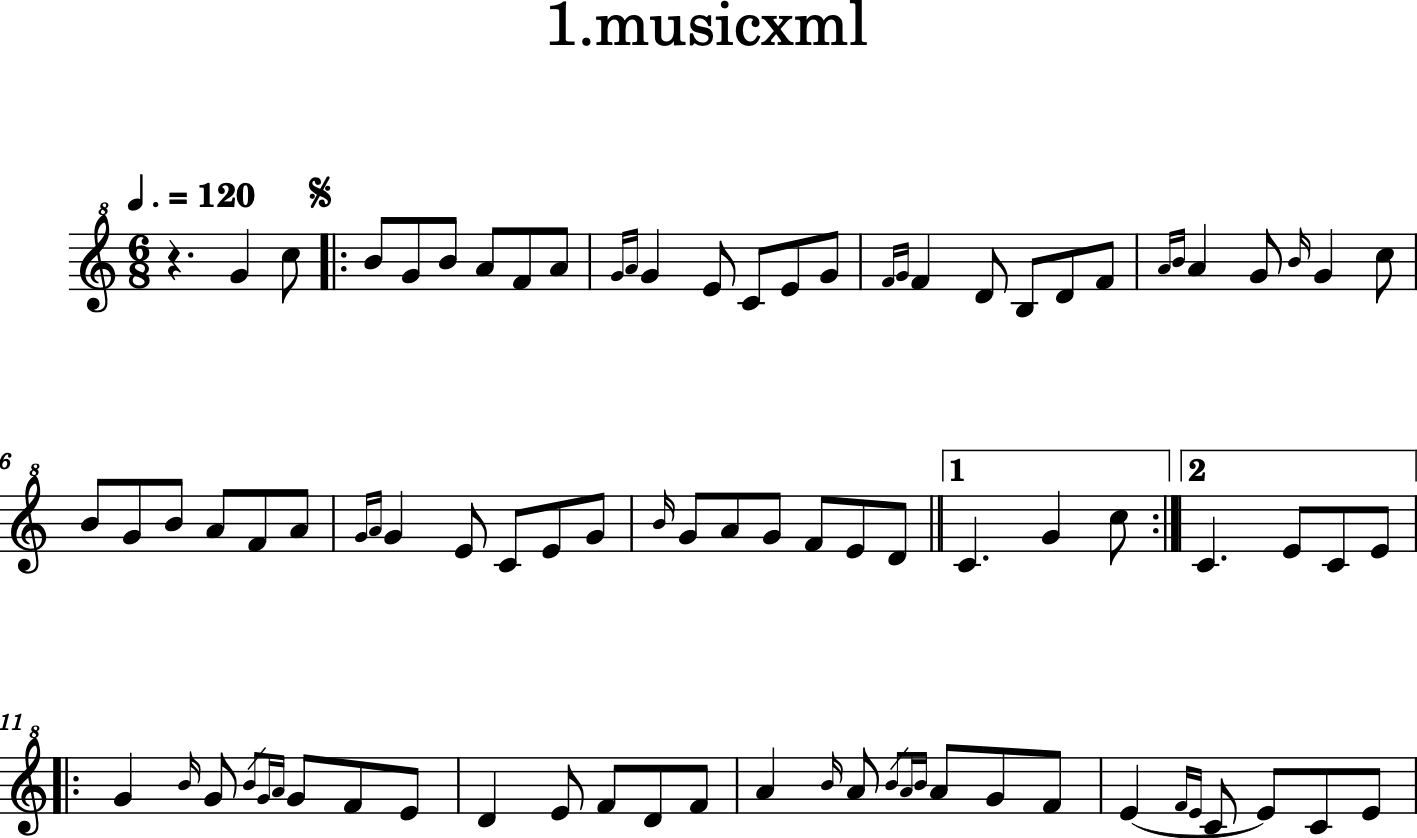

In [55]:
part0 = scoreParts[0] #gaita 
part1 = scoreParts[1] #gaita tercera
part2 = scoreParts[2] #caixa
part3 = scoreParts[3] #bombo

part0.show()

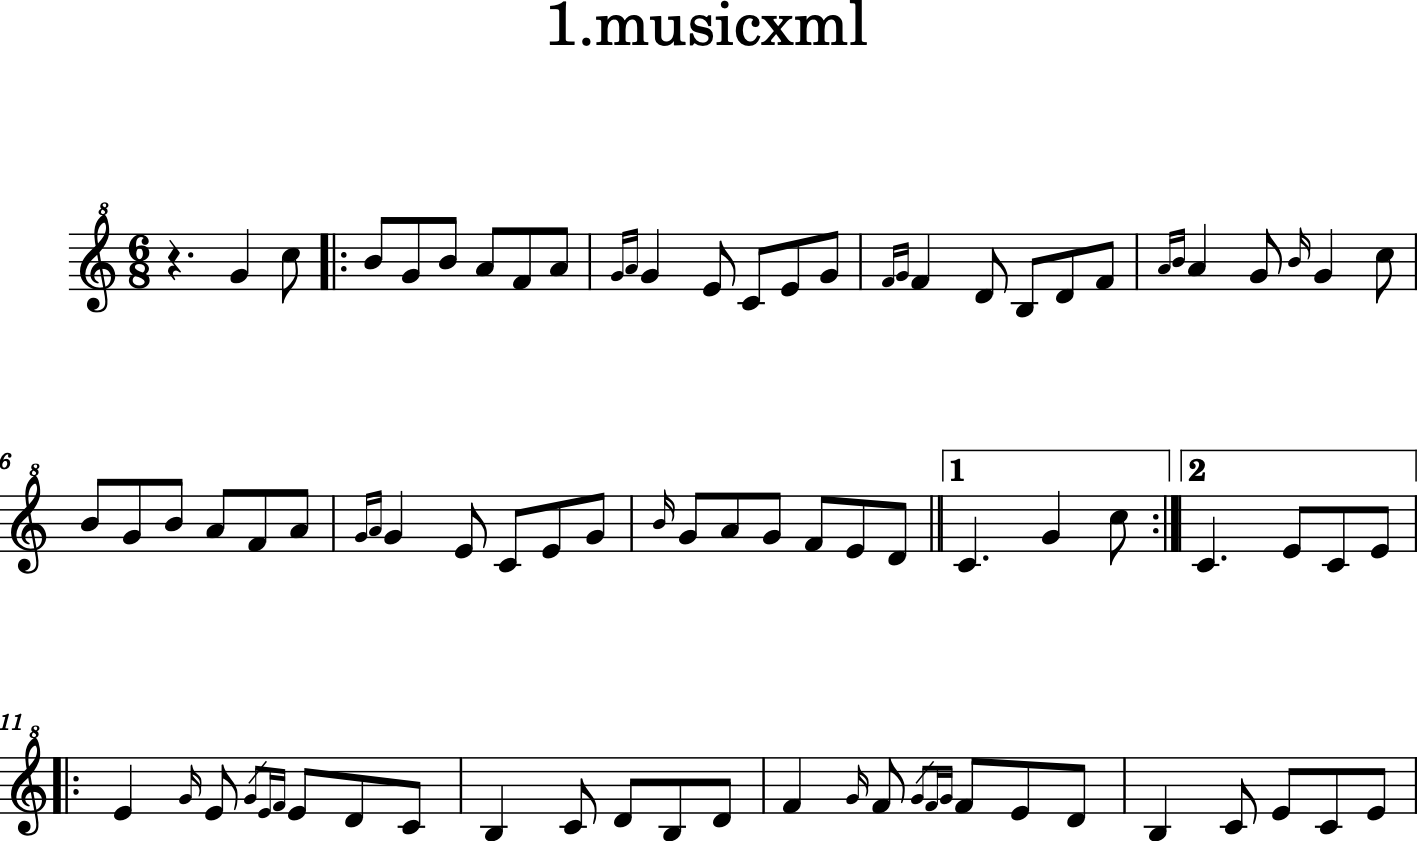

In [53]:
part1.show()

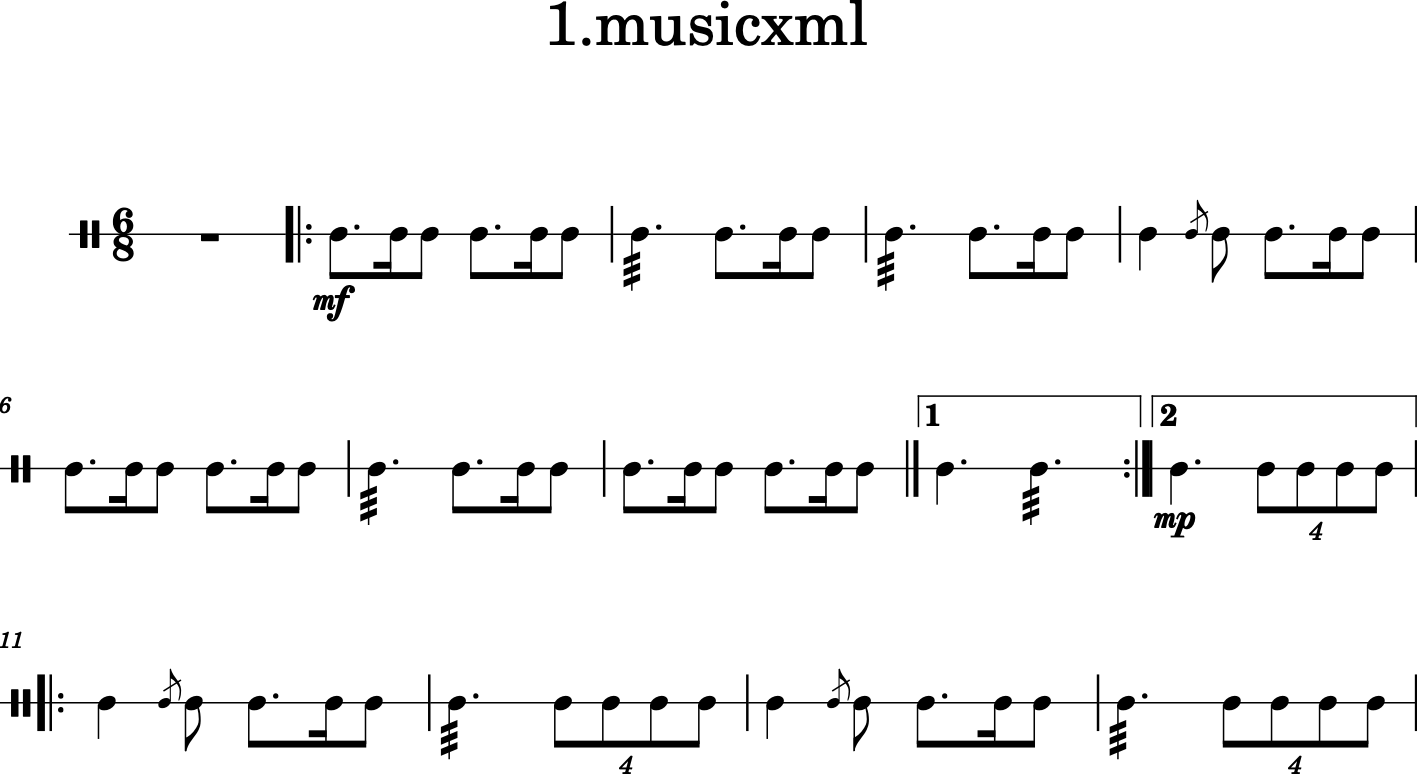

In [54]:
part2 = scoreParts[2]
part2.show()